In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [7]:
import pandas as pd
data=pd.read_csv('/Users/yalagaddaeswaraditya/Desktop/pythonMLproject/MLPython/cirrhosis.csv')

In [8]:
data.shape

(418, 20)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [10]:
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [11]:
data.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [12]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [13]:
data.drop_duplicates()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [14]:
newdata=data.fillna("0")

In [15]:
newdata=newdata.bfill()

In [16]:
newdata.describe()

,ID,N_Days,Age,Bilirubin,Albumin
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,209.500000,1917.782297,18533.351675,3.220813,3.497440
std,120.810458,1104.672992,3815.845055,4.407506,0.424972
min,1.000000,41.000000,9598.000000,0.300000,1.960000
25%,105.250000,1092.750000,15644.500000,0.800000,3.242500
50%,209.500000,1730.000000,18628.000000,1.400000,3.530000
75%,313.750000,2613.500000,21272.500000,3.400000,3.770000
max,418.000000,4795.000000,28650.000000,28.000000,4.640000


In [17]:
newdata["Sex"].value_counts()

F    374
M     44
Name: Sex, dtype: int64

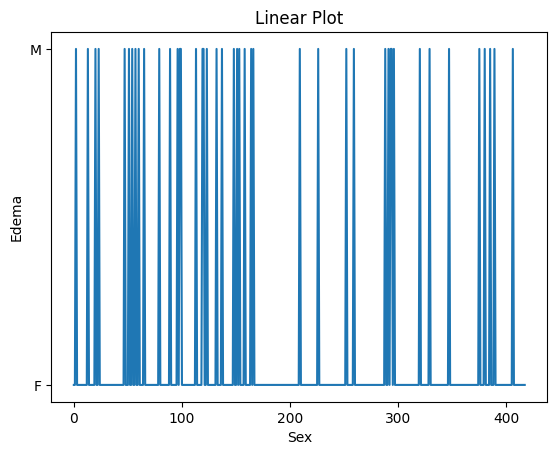

In [18]:
import matplotlib.pyplot as plt
plt.plot(newdata["Sex"])
plt.xlabel("Sex")
plt.ylabel("Edema")
plt.title("Linear Plot")
plt.show()

In [19]:
print(newdata.dtypes)
print(newdata['Edema'].dtype)

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol       object
Albumin          float64
Copper            object
Alk_Phos          object
SGOT              object
Tryglicerides     object
Platelets         object
Prothrombin       object
Stage             object
dtype: object
object


In [20]:
print(newdata['Edema'].unique())

['Y' 'N' 'S']


In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
newdata['Edema'] = label_encoder.fit_transform(newdata['Edema'])

In [22]:
print(newdata['Edema'].unique())

[2 0 1]


In [23]:
print(newdata['Hepatomegaly'].unique())


['Y' 'N' '0']


In [24]:
newdata = newdata.ffill()

In [25]:
print(data['Ascites'].unique())

['Y' 'N' nan]


In [26]:
import pandas as pd

# Assuming 'newdata' is your DataFrame
newdata['Hepatomegaly'].dropna(inplace=True)

# Optional: If you want to reset the index after dropping NaN values
newdata.reset_index(drop=True, inplace=True)


In [27]:
print(newdata['Hepatomegaly'].unique())

['Y' 'N' '0']


In [28]:
print(newdata['Ascites'].unique())

['Y' 'N' '0']


In [29]:
# Assuming 'newdata' is your DataFrame
newdata['Hepatomegaly'] = newdata['Hepatomegaly'].map({'Y': 0, 'N': 1})


In [30]:
print(data['Hepatomegaly'].unique())
print(data['Ascites'].unique())


['Y' 'N' nan]
['Y' 'N' nan]


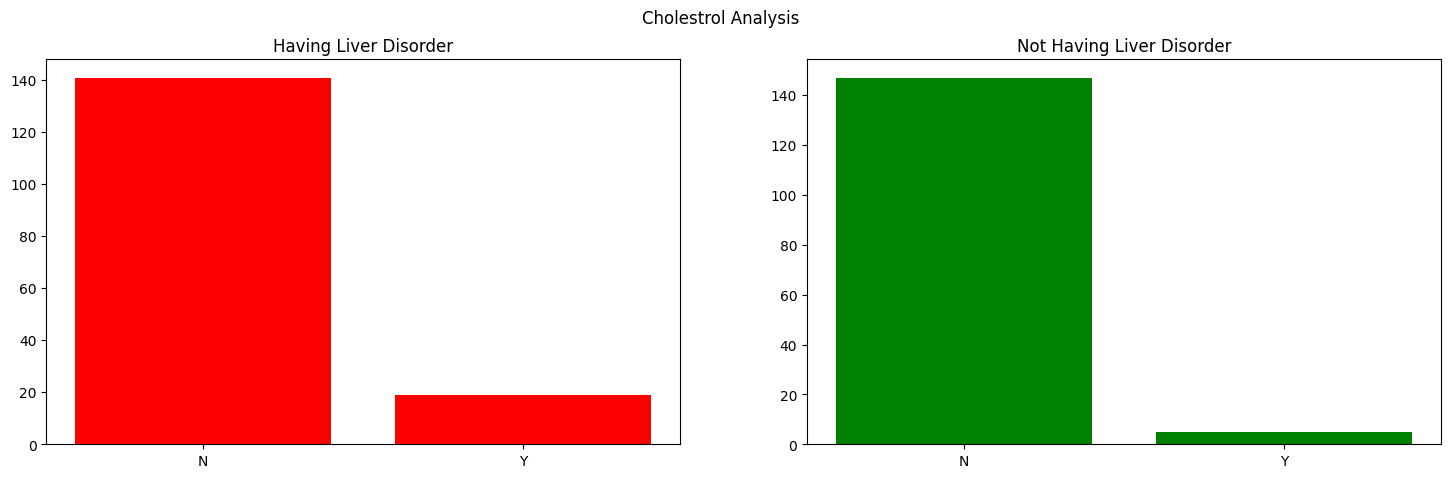

In [31]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 5))
data_len_Y = data[data['Hepatomegaly'] == 'Y']['Ascites'].value_counts()
ax1.bar(data_len_Y.index, data_len_Y, color='red')
ax1.set_title('Having Liver Disorder')
data_len_N = data[data['Hepatomegaly'] == 'N']['Ascites'].value_counts()
ax2.bar(data_len_N.index, data_len_N, color='green')
ax2.set_title('Not Having Liver Disorder')
fig.suptitle('Cholestrol Analysis')
plt.show()

In [32]:
data.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [33]:
data[1:5]

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [34]:
# Assuming 'newdata' is your DataFrame
columns_to_dropna = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides']
newdata[columns_to_dropna].dropna(inplace=True)

# Optional: If you want to reset the index after dropping NaN values
newdata.reset_index(drop=True, inplace=True)


In [35]:
# replacing catagorical data with intigers.
newdata['Sex'] = newdata['Sex'].replace({'M':0, 'F':1})                                # Male : 0 , Female :1
newdata['Ascites'] = newdata['Ascites'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1
newdata['Drug'] = newdata['Drug'].replace({'D-penicillamine':0, 'Placebo':1})          # D-penicillamine : 0, Placebo : 1
newdata['Hepatomegaly'] = newdata['Hepatomegaly'].replace({'N':0, 'Y':1})              # N : 0, Y : 1
newdata['Spiders'] = newdata['Spiders'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1
newdata['Edema'] = newdata['Edema'].replace({'N':0, 'Y':1, 'S':-1})                    # N : 0, Y : 1, S : -1
newdata['Status'] = newdata['Status'].replace({'C':0, 'CL':1, 'D':-1})                 # 'C':0, 'CL':1, 'D':-1

In [36]:
from sklearn import preprocessing
import pandas as pd
numeric_columns = ['Stage', 'Bilirubin', 'Cholesterol', 'Albumin']
non_numeric_columns = set(newdata.columns) - set(numeric_columns)
scaled_numeric = preprocessing.normalize(newdata[numeric_columns], axis=0)
scaled_df = pd.concat([pd.DataFrame(scaled_numeric, columns=numeric_columns), newdata[non_numeric_columns]], axis=1)
scaled_df.head()


,Stage,Bilirubin,Cholesterol,Albumin,Drug,Status,Spiders,ID,Platelets,Copper,Tryglicerides,Sex,Hepatomegaly,N_Days,Age,Alk_Phos,Edema,SGOT,Prothrombin,Ascites
0,0.062561,0.130021,0.035517,0.036096,0,-1,1,1,190.0,156.0,172.0,1,0.0,400,21464,1718.0,2,137.95,12.2,1
1,0.046921,0.009864,0.041096,0.057476,0,0,1,2,221.0,54.0,88.0,1,0.0,4500,20617,7394.8,0,113.52,10.6,0
2,0.062561,0.012554,0.023950,0.048313,0,-1,0,3,151.0,210.0,55.0,0,1.0,1012,25594,516.0,1,96.1,12.0,0
3,0.062561,0.016140,0.033204,0.035263,0,-1,1,4,183.0,64.0,92.0,1,0.0,1925,19994,6121.8,1,60.63,10.3,0
4,0.046921,0.030488,0.037966,0.049007,1,1,1,5,136.0,143.0,72.0,1,0.0,1504,13918,671.0,0,113.15,10.9,0


In [37]:
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report #for confusion matrix
from sklearn.linear_model import LogisticRegression,LinearRegression #logistic regression

In [38]:
from sklearn.preprocessing import LabelEncoder # converts gender into numbers
label_encoder = LabelEncoder()
categorical_cols_to_encode = ['Sex']
for col in categorical_cols_to_encode:
    newdata[col] = label_encoder.fit_transform(newdata[col])
newdata.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,-1,0,21464,1,1,0.0,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0,0,20617,1,0,0.0,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,-1,0,25594,0,0,1.0,0,1,1.4,176.0,3.48,210.0,516.0,96.1,55.0,151.0,12.0,4.0
3,4,1925,-1,0,19994,1,0,0.0,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,1,13918,1,0,0.0,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [39]:
newdata['Stage'] = newdata['Stage'].astype(str)
train, test = train_test_split(newdata, test_size=0.3, random_state=0, stratify=newdata['Stage'])
train_X=train[train.columns[:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]
X=newdata[newdata.columns[:-1]]
Y=newdata['Stage']
len(train_X), len(train_Y), len(test_X), len(test_Y)

(292, 292, 126, 126)

In [40]:
train_combined = pd.concat([train_X, train_Y], axis=1)
test_combined = pd.concat([test_X, test_Y], axis=1)

# Drop rows with NaN values
train_combined = train_combined.dropna()
test_combined = test_combined.dropna()

train_X_cleaned = train_combined[train_combined.columns[:-1]]
train_Y_cleaned = train_combined[train_combined.columns[-1]]
test_X_cleaned = test_combined[test_combined.columns[:-1]]
test_Y_cleaned = test_combined[test_combined.columns[-1]]

model = LogisticRegression()
model.fit(train_X_cleaned, train_Y_cleaned)
prediction3 = model.predict(test_X_cleaned)

print('The accuracy of the Logistic Regression is', accuracy_score(prediction3, test_Y_cleaned))
report = classification_report(test_Y_cleaned, prediction3)
print("Classification Report:\n", report)


The accuracy of the Logistic Regression is 0.48514851485148514
Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.33      0.14      0.19        22
         3.0       0.48      0.77      0.59        39
         4.0       0.55      0.44      0.49        36

    accuracy                           0.49       101
   macro avg       0.34      0.34      0.32       101
weighted avg       0.45      0.49      0.44       101



In [46]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assuming you have DataFrames train_X_cleaned and train_Y_cleaned
# Replace 'your_nan_handling_strategy' with 'mean', 'median', 'most_frequent', or any other imputation strategy you prefer
imputer = SimpleImputer(strategy='mean')

# Impute NaN values in the features (train_X_cleaned)
train_X_cleaned_imputed = pd.DataFrame(imputer.fit_transform(train_X_cleaned), columns=train_X_cleaned.columns)

# Check for NaN values in the target variable (train_Y_cleaned)
if train_Y_cleaned.isnull().sum() > 0:
    # Impute NaN values in the target variable (train_Y_cleaned)
    train_Y_cleaned = pd.DataFrame(imputer.fit_transform(train_Y_cleaned.values.reshape(-1, 1)), columns=train_Y_cleaned.columns)

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(train_X_cleaned_imputed, train_Y_cleaned, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(train_X, train_Y)

# Make predictions on the test set
predictions = model.predict(test_X)

# Calculate metrics
accuracy = mean_squared_error(test_Y, predictions)
rmse = mean_squared_error(test_Y, predictions, squared=False)
mae = mean_absolute_error(test_Y, predictions)
r2 = r2_score(test_Y, predictions)

# Print the results
print('Accuracy:', accuracy)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)


Accuracy: 0.4846183410909779
Root Mean Squared Error: 0.6961453448030648
Mean Absolute Error: 0.5610593793847464
R-squared: 0.1718490640691145


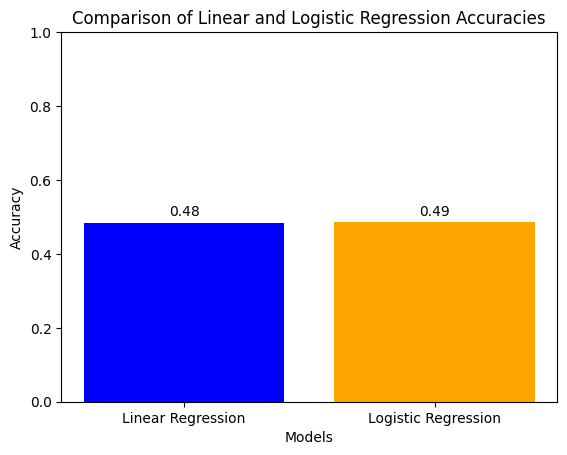

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assuming you have DataFrames train_X_cleaned, train_Y_cleaned, test_X_cleaned, and test_Y_cleaned

# Linear Regression
# ... (your existing linear regression code)

# Logistic Regression
model_logistic = LogisticRegression()
model_logistic.fit(train_X_cleaned, train_Y_cleaned)
predictions_logistic = model_logistic.predict(test_X_cleaned)

# Calculate accuracy for Logistic Regression
accuracy_logistic = accuracy_score(test_Y_cleaned, predictions_logistic)

# Calculate accuracy for Linear Regression
accuracy_linear = mean_squared_error(test_Y, predictions)
# Create a bar plot for accuracies with values on top
models = ['Linear Regression', 'Logistic Regression']
accuracies = [accuracy_linear, accuracy_logistic]

plt.bar(models, accuracies, color=['blue', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Linear and Logistic Regression Accuracies')

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()
